# **Assignment 2** 

In [1846]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [1847]:
stock_3month = pd.read_csv('./Quote-Equity-CIPLA-EQ-12-03-2023-to-12-06-2023.csv') #loading data
stock_1month = pd.read_csv('./Quote-Equity-CIPLA-EQ-12-06-2023-to-12-07-2023.csv')
stock_1month.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [1848]:
#converting string to float values removing ","
columns = ['VOLUME ','No of trades ']
for label in columns :
    stock_3month[label] = stock_3month[label].str.replace(',','').astype(float)

In [1849]:
columns = ['OPEN ','HIGH ','LOW ','vwap ','VOLUME ','No of trades ','close ']
for label in columns :
    stock_1month[label] = stock_1month[label].str.replace(',','').astype(float)

In [1850]:
x = stock_3month[['OPEN ','HIGH ','LOW ','vwap ','VOLUME ','No of trades ']]
y = stock_3month['close ']
stock_x = stock_1month[['OPEN ','HIGH ','LOW ','vwap ','VOLUME ','No of trades ']]
stock_y = stock_1month['close ']

In [1851]:
x_numpy=np.array(x)
y_numpy=np.array(y)
test_x=np.array(stock_x)
test_y=np.array(stock_y)

In [1852]:
x_train, x_test, y_train, y_test = train_test_split(x_numpy,y_numpy,test_size=0.1,random_state=27)

In [1853]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 6)
(7, 6)
(54,)
(7,)


In [1854]:
model = LinearRegression()

In [1855]:
model.fit(x_train,y_train)

LinearRegression()

In [1856]:
y_pred=model.predict(test_x)
mse=mean_squared_error(test_y,y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  12.902021422232053


In [1857]:
test_data=pd.DataFrame({'Date' : stock_1month['Date '].str.replace('-2023',''),'OPEN' : test_x[:,0] ,'HIGH' : test_x[:,1] ,'LOW' : test_x[:,2],'vwap':test_x[:,3],'VOLUME' : test_x[:,4],'No of trades' : test_x[:,5],'Real_Closing_Value': test_y, 'Pred_Closing_Value' : y_pred})
test_data

,Date,OPEN,HIGH,LOW,vwap,VOLUME,No of trades,Real_Closing_Value,Pred_Closing_Value
0,12-Jul,1025.00,1032.90,1019.95,1024.43,1163653.0,46144.0,1022.20,1026.512004
1,11-Jul,1018.95,1033.50,1018.00,1027.80,814514.0,40769.0,1027.80,1032.426304
2,10-Jul,1024.00,1026.00,1013.00,1020.03,1142988.0,46747.0,1016.70,1019.994171
3,07-Jul,1009.45,1028.75,998.05,1015.79,1914093.0,82918.0,1020.65,1017.667134
4,06-Jul,1012.00,1023.55,1011.40,1018.42,1236819.0,55198.0,1021.25,1021.239131
5,05-Jul,1017.00,1018.80,1005.40,1012.50,748219.0,41616.0,1010.80,1012.412658
6,04-Jul,1007.95,1016.00,996.50,1004.88,1112255.0,40847.0,1011.85,1006.720500
7,03-Jul,1020.50,1029.90,999.00,1012.99,1454455.0,69247.0,1001.80,1011.903619
8,30-Jun,1009.90,1021.45,1005.00,1014.31,1963457.0,86602.0,1014.95,1014.440430
9,28-Jun,1007.00,1018.50,1004.05,1010.95,1653212.0,55176.0,1009.90,1013.801710


## How *Closing Price* is affected by each parameter ?

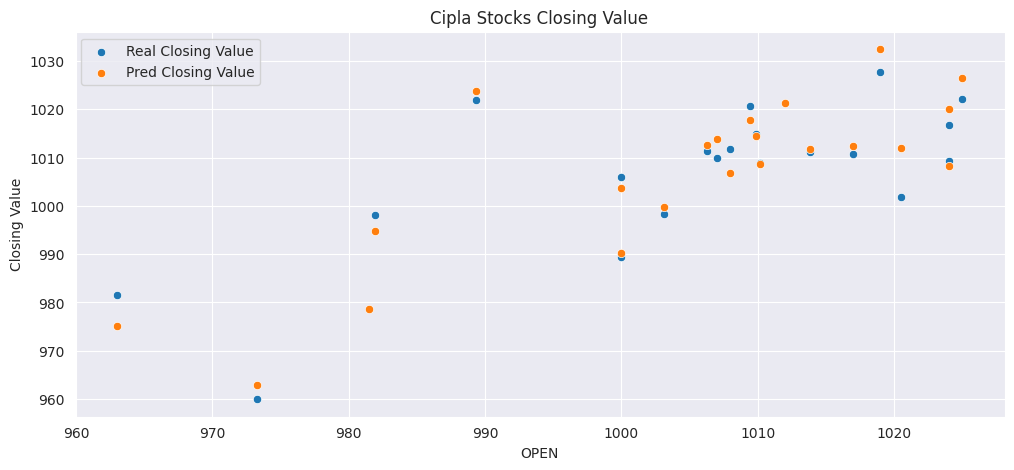

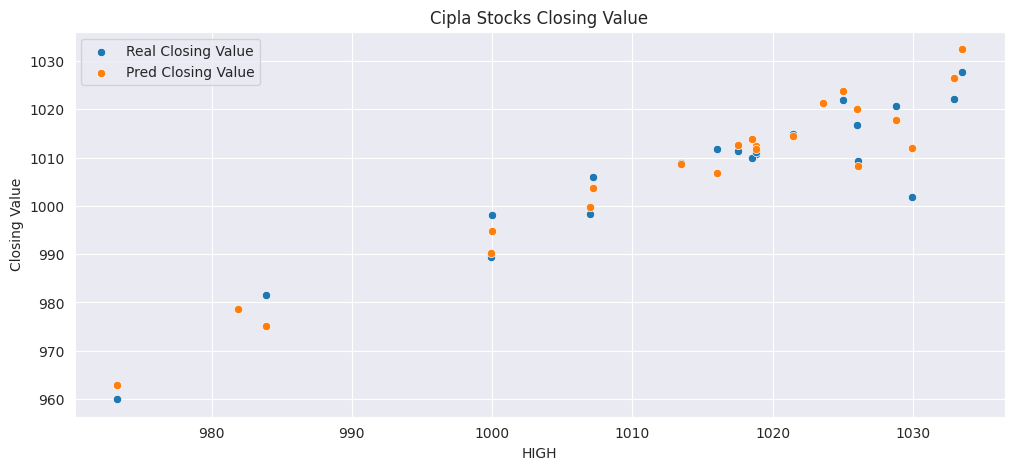

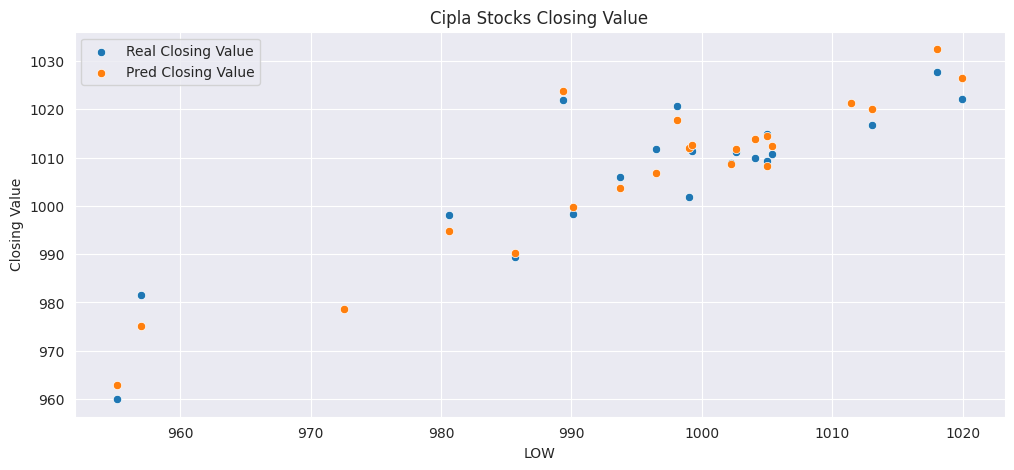

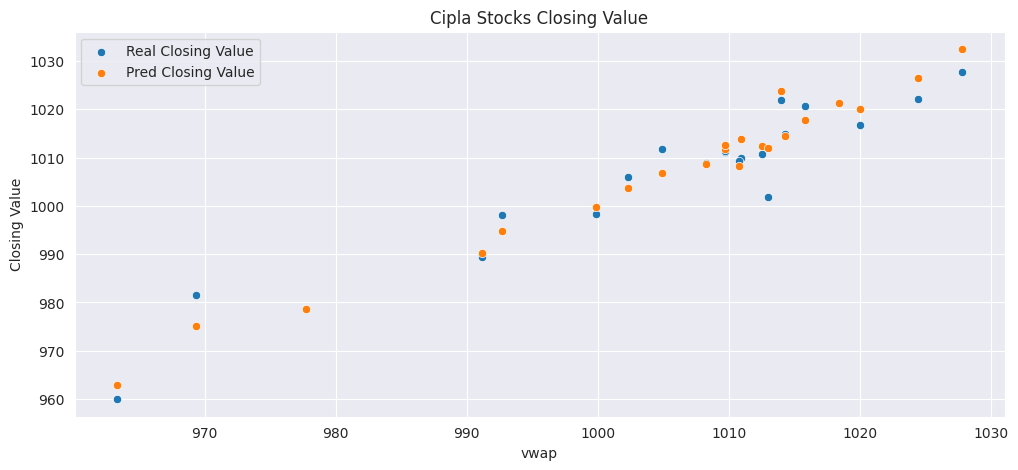

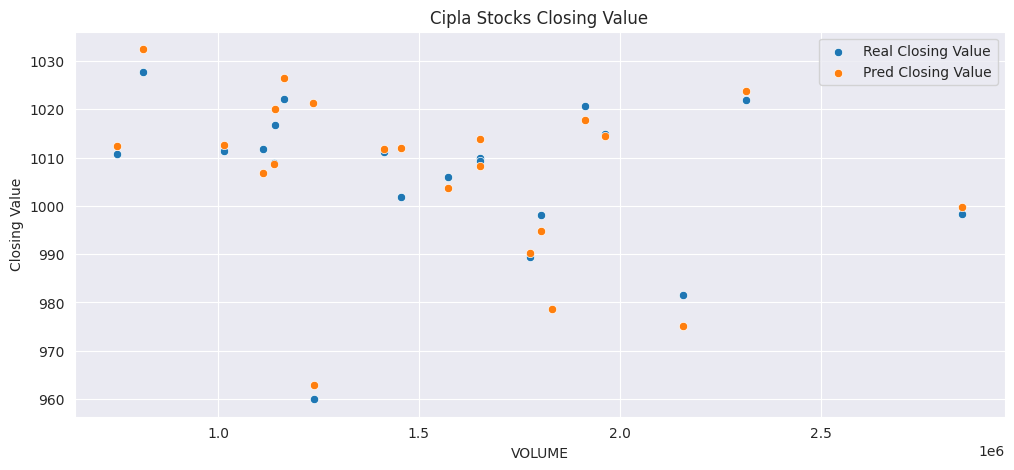

In [1858]:
sns.set_style("darkgrid")
columns = ['OPEN','HIGH','LOW','vwap','VOLUME']
for label in columns :
    plt.figure(figsize=(12,5))
    sns.scatterplot(data=test_data , x=label , y='Real_Closing_Value')
    sns.scatterplot(data=test_data , x=label , y='Pred_Closing_Value')
    plt.title("Cipla Stocks Closing Value")
    plt.ylabel("Closing Value")
    plt.legend(['Real Closing Value' , 'Pred Closing Value'])
    plt.show()

## Real World **vs** Mathematical Prediction

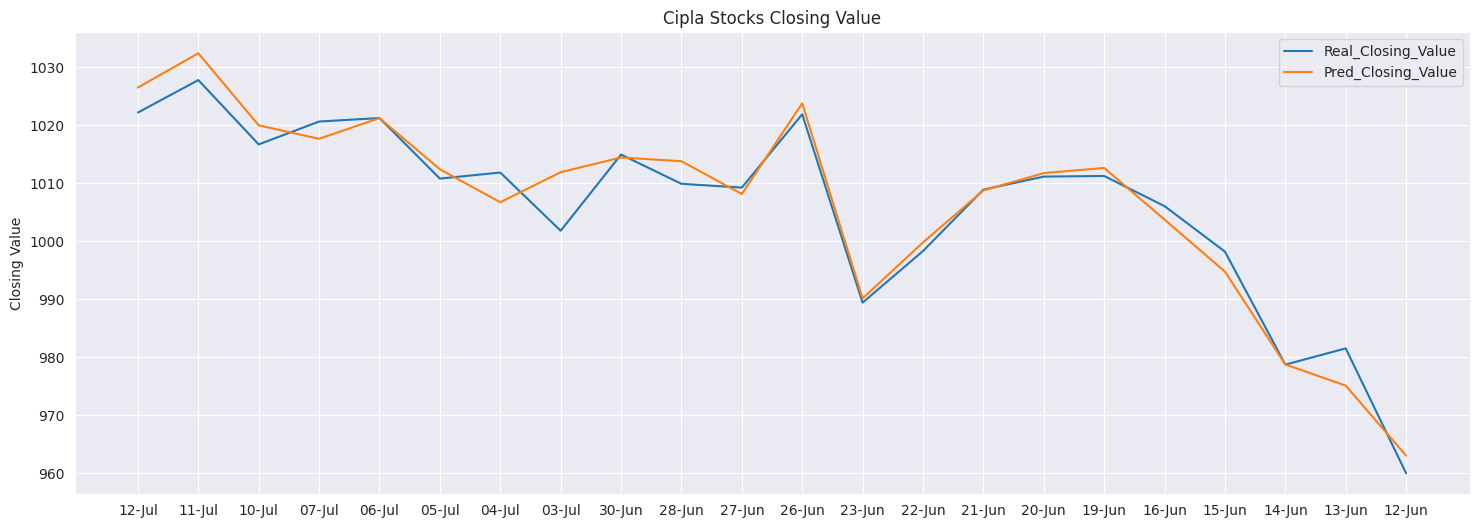

In [1859]:
plt.figure(figsize=(18,6))
plt.plot(test_data['Date'] , test_data['Real_Closing_Value'])
plt.plot(test_data['Date'] , test_data['Pred_Closing_Value'])
plt.title("Cipla Stocks Closing Value")
plt.ylabel("Closing Value")
plt.legend(['Real_Closing_Value','Pred_Closing_Value'])
plt.show()

/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x600 with 0 Axes>

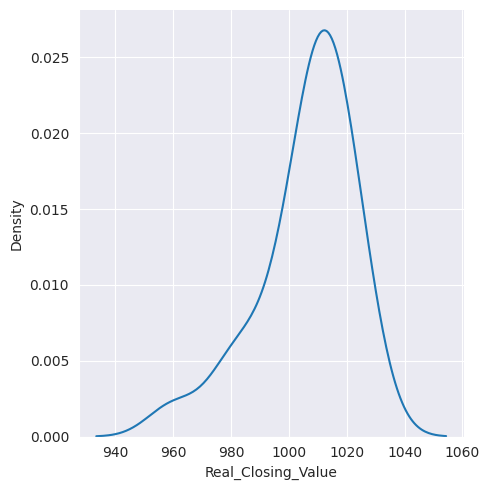

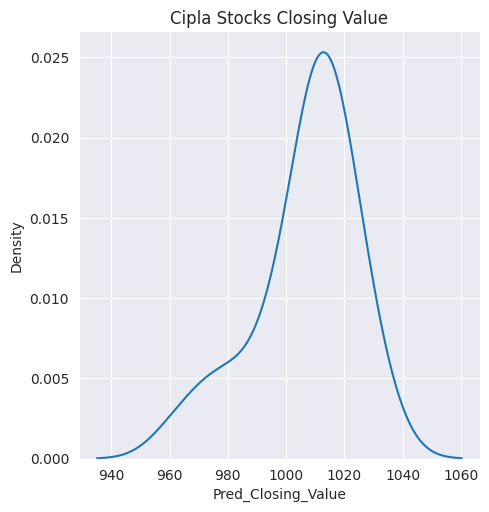

In [1860]:
plt.figure(figsize=(18,6))
sns.displot(data=test_data , x='Real_Closing_Value',kind='kde')
sns.displot(data=test_data , x='Pred_Closing_Value',kind='kde')
plt.title("Cipla Stocks Closing Value")
# plt.legend(['Real Closing Value' , 'Pred Closing Value'])
plt.show()

## Major Contributors 

/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ayan/Desktop/Python_for_DS/env_DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


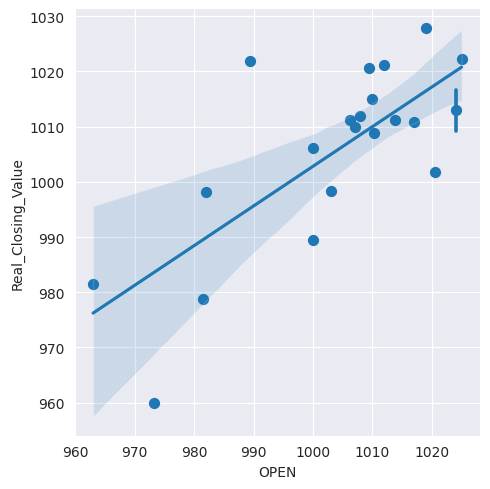

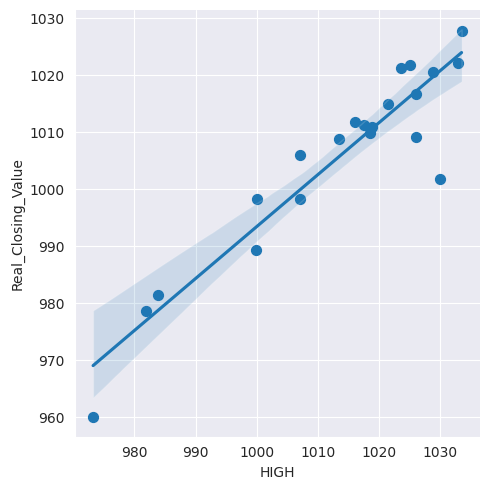

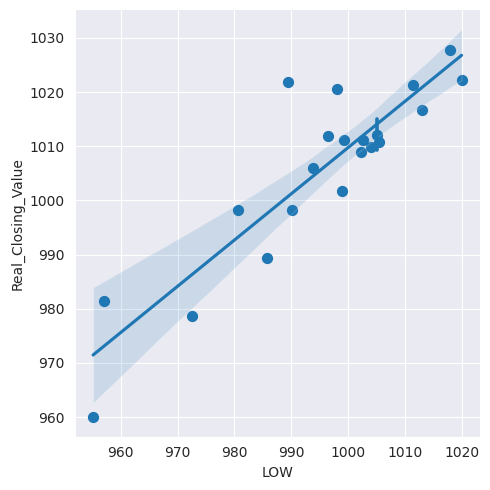

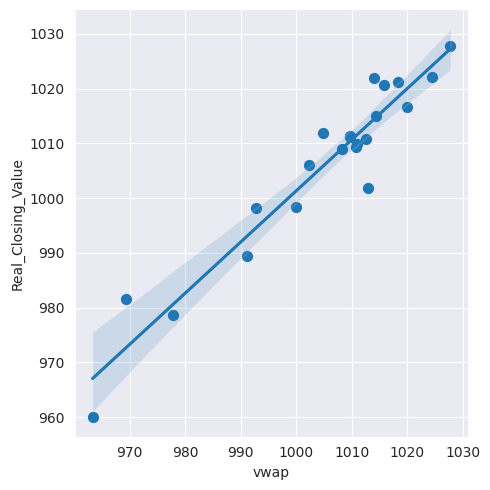

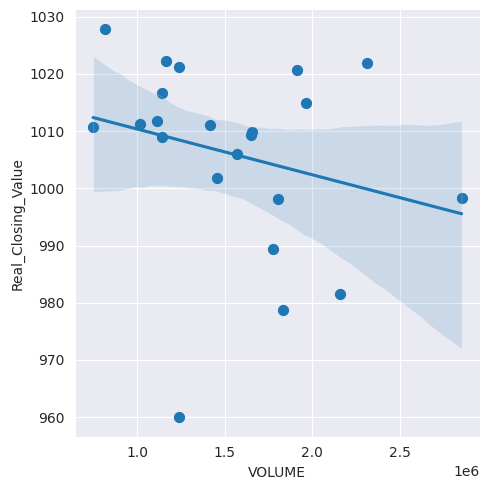

In [1861]:
columns = ['OPEN','HIGH','LOW','vwap','VOLUME']
for label in columns :
    sns.lmplot(x=label, y="Real_Closing_Value", data=test_data, x_estimator=np.mean);

This analysis shows that the Closing Price of the **Cipla stocks were affected more closely by **HIGH** and **VWAP** values** as we observed minimum deviation about those two as observed from above graph also the Expected value is good as the **mse** was found to be about **13** . Also the closing value remained about **1012**(mode) as observed from the displot above. Scatter plot again shows close relation of VWAP and HIGH values with stock Closing Price.